# Hypothesis Testing in Python
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import pandas
import pandas as pd
import numpy as np

# Import the course datasets 
republican_votes = pd.read_feather('datasets/repub_votes_potus_08_12.feather')
democrat_votes = pd.read_feather('datasets/dem_votes_potus_12_16.feather')
late_shipments = pd.read_feather('datasets/late_shipments.feather')
stackoverflow = pd.read_feather("datasets/stack_overflow.feather")

In [2]:
stackoverflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,currency_desc,currency_symbol,database_desire_next_year,database_worked_with,dev_type,ed_level,employment,ethnicity,gender,job_factors,job_sat,job_seek,language_desire_next_year,language_worked_with,misc_tech_desire_next_year,misc_tech_worked_with,new_collab_tools_desire_next_year,new_collab_tools_worked_with,new_dev_ops,new_dev_ops_impt,new_ed_impt,new_job_hunt,new_job_hunt_research,new_learn,new_off_topic,new_onboard_good,new_other_comms,new_overtime,new_purchase_research,purple_link,newso_sites,new_stuck,op_sys,org_size,platform_desire_next_year,platform_worked_with,purchase_what,sexuality,so_account,so_comm,so_part_freq,so_visit_freq,survey_ease,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,Pound sterling,GBP,Microsoft SQL Server;MongoDB;SQLite,IBM DB2;Microsoft SQL Server;MongoDB;SQLite,Data or business analyst;Data scientist or mac...,Some college/university study without earning ...,Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly satisfied,"I’m not actively looking, but I am open to new...",C#;Go;HTML/CSS;JavaScript;Python;SQL,C#;Go;HTML/CSS;Java;JavaScript;Python;R;SQL,Keras;Node.js;Pandas;TensorFlow,Node.js;Pandas,Confluence;Jira;Github;Slack;Trello,Confluence;Jira;Github;Slack;Trello,Not sure,Neutral,Somewhat important,Having a bad day (or week or month) at work;Cu...,None,Every few months,No,Yes,No,Sometimes: 1-2 days per month but less than we...,None,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,Windows,"1,000 to 4,999 employees",Linux;MacOS;Windows,MacOS;Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",Less than once per month or monthly,Multiple times per day,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,Pound sterling,GBP,PostgreSQL;SQLite,Microsoft SQL Server;Oracle;PostgreSQL;SQLite,Data scientist or machine learning specialist;...,"Other doctoral degree (Ph.D., Ed.D., etc.)",Employed full-time,White or of European descent,Man,Remote work options;How widely used or impactf...,Very satisfied,"I’m not actively looking, but I am open to new...",Bash/Shell/PowerShell;Java;Python;SQL,Bash/Shell/PowerShell;C#;Java;JavaScript;Pytho...,Pandas,.NET;.NET Core,Github;Gitlab,Confluence;Jira;Github;Gitlab;Microsoft Azure;...,Yes,Neutral,Not at all important/not necessary,Just because;Having a bad day (or week or mont...,"Read company media, such as employee blogs or ...",Once a year,No,Onboarding? What onboarding?,Yes,Occasionally: 1-2 days per quarter but less th...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Call a coworker or friend;Visit Stack Overflow...,Linux-based,10 to 19 employees,Arduino;Docker;Linux;Raspberry Pi,Arduino;AWS;Linux;Microsoft Azure;Raspberry Pi,I have some influence,Straight / Heterosexual,Yes,"Yes, definitely",A few times per week,A few times per week,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,European Euro,EUR,PostgreSQL,MongoDB,Data scientist or machine learning specialist;...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of Europea

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [3]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [4]:
# Print the late_shipments dataset
print(late_shipments)

# Calculate the proportion of late shipments
late_prop_samp = (late_shipments.late == 'Yes').mean()

# Print the results
print(late_prop_samp)

          id       country  ... freight_cost_groups line_item_insurance_usd
0    36203.0       Nigeria  ...           expensive                  373.83
1    30998.0      Botswana  ...          reasonable                    1.72
2    69871.0       Vietnam  ...           expensive                  181.57
3    17648.0  South Africa  ...           expensive                  779.41
4     5647.0        Uganda  ...          reasonable                    0.01
..       ...           ...  ...                 ...                     ...
995  13608.0        Uganda  ...          reasonable                   12.72
996  80394.0    Congo, DRC  ...          reasonable                   13.10
997  61675.0        Zambia  ...           expensive                  210.49
998  39182.0  South Africa  ...           expensive                 1421.41
999   5645.0      Botswana  ...          reasonable                   23.04

[1000 rows x 27 columns]
0.061


__Calculate the Z-score__

In [5]:
   import numpy as np
   # Step 3. Repeat steps 1 & 2 many times, appending to a list
   late_shipments_boot_distn = []
   for i in range(500):
     late_shipments_boot_distn.append(
       # Step 2. Calculate point estimate
np.mean(
           # Step 1. Resample
           late_shipments.sample(frac=1, replace=True)['late_delivery']
       )
)

In [6]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn)

# Find z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Print z_score
print(z_score)

0.13816598960883683


__p-values__

In [7]:
from scipy.stats import norm
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score,loc = 0,scale = 1)
                 
# Print the p-value
print(p_value) 

0.4450546168091043


In [8]:
from scipy.stats import norm
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp - late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score,loc = 0,scale = 1)
                 
# Print the p-value
print(p_value) 

0.4450546168091043


In [9]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.075)


Two sample mean test statistic
The hypothesis test for determining if there is a difference between the means of two populations uses a different type of test statistic to the z-scores you saw in Chapter 1. It's called "t", and it can be calculated from three values from each sample using this equation.

 
 
 

While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

In [10]:
numerator = late_shipments[late_shipments.late == 'No']['weight_kilograms'].mean() - late_shipments[late_shipments.late == 'Yes']['weight_kilograms'].mean()
denominator = np.sqrt((late_shipments[late_shipments.late == 'Yes']['weight_kilograms'].std()**2)/len(late_shipments[late_shipments.late == 'Yes']) + (late_shipments[late_shipments.late == 'No']['weight_kilograms'].std()**2)/len(late_shipments[late_shipments.late == 'No']))
t_stat = numerator/denominator
print(t_stat)

-2.3936661778766433


In [11]:
from scipy.stats import t

In [12]:
# Calculate the degrees of freedom
degrees_of_freedom = len(late_shipments[late_shipments.late == 'Yes']) + len(late_shipments[late_shipments.late == 'No']) - 2

# Calculate the p-value from the test stat
p_value =  t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

0.008432382146249523


__paired t-test__

In [13]:
democrat_votes.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [14]:
sample_dem_data = democrat_votes.sample(500)
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']
# Print sample_dem_data
print(sample_dem_data)

              state     county  dem_percent_12  dem_percent_16       diff
255         Montana   Flathead       31.953262       28.543514   3.409747
235        Missouri      Adair       41.665021       34.226482   7.438539
217       Minnesota     Ramsey       66.328339       65.071409   1.256929
310  North Carolina  Edgecombe       67.885214       65.193281   2.691933
430           Texas   Mitchell       23.229706       16.120219   7.109488
..              ...        ...             ...             ...        ...
448            Utah      Grand       43.721519       43.238473   0.483046
307  North Carolina    Catawba       34.581400       29.323714   5.257686
405       Tennessee      Union       25.360329       16.199776   9.160554
265        Nebraska     Blaine        9.570957        9.463722   0.107235
244        Missouri    Madison       32.210953       18.887427  13.323526

[500 rows x 5 columns]


In [15]:
# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Print xbar_diff
print(xbar_diff)

6.829312660106834


In [16]:
# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Print s_diff
print(s_diff)

5.040139140132317


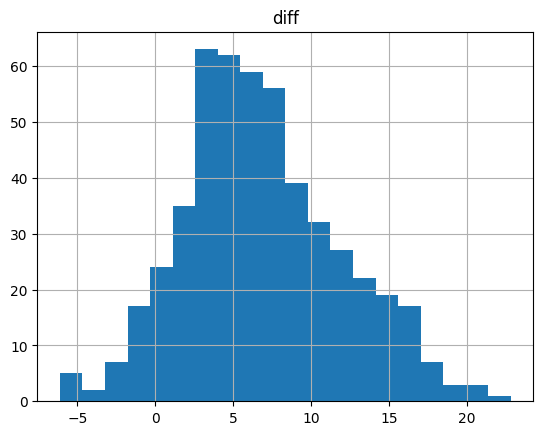

In [17]:
# Plot a histogram of diff with 20 bins
import matplotlib.pyplot as plt
sample_dem_data.hist('diff',bins = 20)
plt.show()

In [18]:
import pingouin
pingouin.ttest(x=sample_dem_data['diff'],y=0,alternative="two-sided")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


In [19]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(sample_dem_data['dem_percent_12'],sample_dem_data['dem_percent_16'],paired = True,alternative = 'two-sided')
                         
# Print the paired test results
paired_test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


__Anova__

In [20]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode').pack_price.mean()

# Print the grouped means
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [21]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()

# Print the grouped standard deviations
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


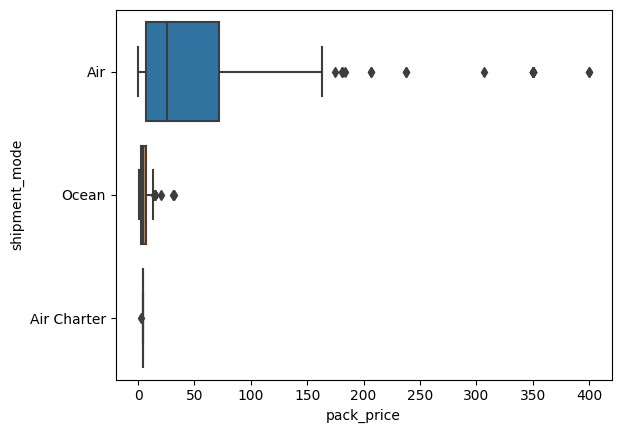

In [22]:
# Boxplot of shipment_mode vs. pack_price
import seaborn as sns
sns.boxplot(x = 'pack_price',y = 'shipment_mode',data = late_shipments)
plt.show()

In [23]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data = late_shipments,dv = 'pack_price',between = 'shipment_mode')



# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


5.089479e-10 < α
At least two categories have significantly different compensation

In [24]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  ...  p-adjust       BF10    hedges
0  shipment_mode          Air  Air Charter  ...      bonf  5.809e+76  0.726592
1  shipment_mode          Air        Ocean  ...      bonf  1.129e+67  0.711119
2  shipment_mode  Air Charter        Ocean  ...      bonf     15.277 -0.423775

[3 rows x 13 columns]


__One sample proportion tests__

In [25]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [26]:

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt((p_0*(1-p_0))/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

0.13315591032282698


In [27]:

# Calculate the p-value from the z-score
p_value = 1 - norm.cdf(z_score)

# Print the p-value
print(p_value)

0.44703503936503364


In [28]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups').late.value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: late, dtype: int64


In [29]:
from statsmodels.stats.proportion import proportions_ztest
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby("freight_cost_groups")['late'].value_counts()

# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489 + 42, 439 + 16])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count = success_counts,nobs = n,alternative = 'larger')


# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


__Chi-square test of independance__

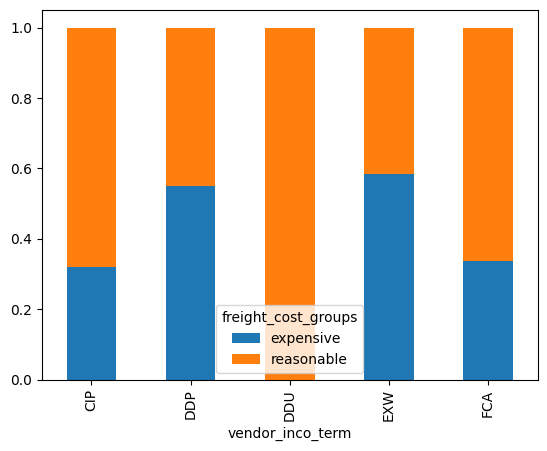

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


In [30]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind="bar", stacked=True)
plt.show()

# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments,x = 'vendor_inco_term',y = 'freight_cost_groups')

# Print results
print(stats[stats['test'] == 'pearson']) 

In [31]:
late_shipments

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,13608.0,Uganda,PMO - US,Direct Drop,DDP,Air,0.0,No,ARV,Adult,ASPEN PHARMACARE,"Etravirine 100mg [Intelence], tablets, 120 Tabs",Etravirine,Intelence,100mg,Tablet,120.0,121.0,9075.00,75.00,0.62,"Janssen-Cilag, Latina, IT",Yes,43.0,199.00,reasonable,12.72
996,80394.0,"Congo, DRC",PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,292.0,9344.00,32.00,1.60,"Trinity Biotech, Plc",Yes,99.0,2162.55,reasonable,13.10
997,61675.0,Zambia,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2127.0,170160.00,80.00,0.80,"Alere Medical Co., Ltd.",Yes,881.0,14019.38,expensive,210.49
998,39182.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30.0,191011.0,861459.61,4.51,0.15,"Aurobindo Unit III, India",Yes,16234.0,14439.17,expensive,1421.41


__Assumptions in hypothesis testing__

In [32]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

expensive     531
reasonable    455
Name: freight_cost_groups, dtype: int64
True


In [33]:
# Count the late values
counts = late_shipments.late.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

No     939
Yes     61
Name: late, dtype: int64
True


In [34]:
# Count the values of freight_cost_group grouped by vendor_inco_term
counts = late_shipments.groupby('vendor_inco_term').freight_cost_groups.value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

vendor_inco_term  freight_cost_groups
CIP               reasonable              34
                  expensive               16
DDP               expensive               55
                  reasonable              45
DDU               reasonable               1
EXW               expensive              423
                  reasonable             302
FCA               reasonable              73
                  expensive               37
Name: freight_cost_groups, dtype: int64
False


In [35]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

Air            906
Ocean           88
Air Charter      6
Name: shipment_mode, dtype: int64
False


__Non-parametric tests__

In [36]:
 alpha = 0.01
 import pingouin
 pingouin.ttest(x=republican_votes['repub_percent_08'].sample(50),
                y=republican_votes['repub_percent_12'].sample(50),
                paired=True,
                alternative="two-sided")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.322046,49,two-sided,0.02443,"[-11.34, -0.82]",0.476623,1.761,0.910447


In [37]:
 pingouin.wilcoxon(x=republican_votes['repub_percent_08'].sample(50),
                y=republican_votes['repub_percent_12'].sample(50),
                alternative="two-sided")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,636.0,two-sided,0.992367,0.002353,0.4876


__Non-parametric Anova and unpaired t-test__

In [38]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[["weight_kilograms", "late"]]

# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')

# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test = pingouin.mwu(x=weight_vs_late_wide['No'],
                        y=weight_vs_late_wide['Yes'],
                        alternative='two-sided')

# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  19134.0   two-sided  0.000014  0.331902  0.334049


In [39]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data = late_shipments,dv = 'weight_kilograms',between = 'shipment_mode')



# Print the results
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28
